# Using English Dataset which is extracted from previous all language dataset


In [35]:
import pandas as pd
df_en = pd.read_csv('df_en.csv')
df_en.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,answer_label,cluster_no
0,Urgent Assistance Required: AWS Service,"Dear IT Services Support Team, \n\nI am reachi...","Dear <name>,\n\nThank you for reaching out reg...",Request,IT Support,high,en,IT Services,IT Support,Urgent Issue,Service Notification,Cloud Services,Problem Resolution,Technical Guidance,Performance Tuning,NaN,NaN,0,0
1,Urgent: Issue with Zoom Screen Sharing Feature,"Dear Customer Support,\n\nI am experiencing a ...","Dear <name>,\n\nThank you for reaching out. We...",Incident,Technical Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,Software Bug,NaN,NaN,NaN,NaN,4,3
2,Service outage resolution requested for ongoin...,"Dear IT Services Customer Support,\n\nI am wri...","Dear <name>,\n\nThank you for reaching out to ...",Change,Service Outages and Maintenance,high,en,IT Services,Service Outage,IT Support,Problem Resolution,Technical Support,Service Recovery,System Maintenance,Performance Tuning,Urgent Issue,NaN,0,0
3,Surface Pro 7 Issue,"Dear Tech Online Store Support Team,\n\nI hope...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN,6,3
4,Request for software development consultation ...,"Dear Customer Support,\n\nI hope this message ...","Dear <name>,\n\nThank you for reaching out reg...",Request,Technical Support,medium,en,IT Services,IT Support,Technical Guidance,Problem Resolution,Service Notification,Urgent Issue,NaN,NaN,NaN,NaN,0,1


In [36]:
df_en.shape

(1391, 19)

In [37]:
df_en['cluster_no'].value_counts()

,count
cluster_no,
2,391
1,296
4,224
0,211
3,155
5,114


In [38]:
df_en.loc[df_en['cluster_no'].eq(2),:]['answer'].sample(10)

,answer
900,"Dear <name>,\n\nThank you for reaching out to ..."
277,"Dear <name>, \n\nWe're sorry to hear about the..."
554,We'll investigate the issue with Zoom 5.11.0. ...
1185,"Dear <name>,\nWe're sorry to hear about the to..."
172,"Dear <name>,\n\nThank you for reaching out and..."
23,"Dear <name>, please check if the color ink car..."
501,"Dear <name>,\n\nThank you for reaching out reg..."
1091,Kindly clear your browser cache or switch to a...
1372,"Dear <name>,\n\nThank you for reaching out and..."
1349,We appreciate your reaching out to us. Could y...


In [39]:
cluster_2_df_en = df_en.loc[df_en['cluster_no'].eq(2),:]

In [40]:
cluster_2_df_en.head()

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,answer_label,cluster_no
8,Assistance Needed for Chrome Crashes,"Dear Tech Online Store Customer Support, I am ...","Dear <name>,\n\nThank you for contacting Tech ...",Problem,Technical Support,low,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,Customer Service,NaN,NaN,NaN,NaN,NaN,6,2
9,NaN,"Dear Customer Care,\n\nI am encountering chall...","Dear <name>,\n\nWe appreciate you getting in t...",Problem,Technical Support,medium,en,IT Services,Technical Support,Product Support,Software Bug,Problem Resolution,Account Assistance,NaN,NaN,NaN,NaN,4,2
10,Google Chrome Extension Issue,"Dear Customer Support, I am experiencing a com...","Dear <name>,\n\nThank you for reaching out. We...",Request,Product Support,medium,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,Technical Guidance,Customer Service,NaN,NaN,NaN,NaN,6,2
12,Inquiry About Dell XPS 13 Battery Optimization,"Dear Customer Support, \n\nI hope this message...","Dear <name>,\n\nThank you for reaching out reg...",Request,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Performance Tuning,Technical Guidance,General Inquiry,Software Bug,NaN,NaN,NaN,6,2
14,Challenge with Instance Launch,Concern with service implementation.,"Hello, could you provide further details about...",Problem,Customer Service,medium,en,IT Services,Technical Support,Service Disruption,Problem Resolution,Product Support,NaN,NaN,NaN,NaN,NaN,4,2


In [41]:
cluster_2_df_en.shape

(391, 19)

In [42]:
# prompt: give two samples from cluster_2_df_en in form of list, of body, answer and type cloumn

import pandas as pd

sample_data = []
for index, row in cluster_2_df_en.sample(n=2).iterrows():
    sample = [row['body'], row['answer'], row['type']]
    sample_data.append(sample)

sample_data

[['Dear Customer Support,\n\nCould you please provide detailed specifications and a comparison between the Dell XPS 13 9310 and the MacBook Air M1? A customer requested this information to make an informed purchase decision.\n\nThank you for your assistance.\n\nBest regards,\n\n<name>',
  'Dear <name>,\n\nCertainly! Here are the key specifications and comparison:\n\nDell XPS 13 9310:\n- Processor: Intel i5/i7, 11th Gen\n- Display: 13.4" FHD+/UHD+\n- RAM: 8GB/16GB\n- Storage: 256GB/512GB/1TB SSD\n- OS: Windows 10\n\nMacBook Air M1:\n- Processor: Apple M1\n- Display: 13.3" Retina\n- RAM: 8GB/16GB\n- Storage: 256GB/512GB/1TB SSD\n- OS: macOS\n\nBoth offer excellent performance. Dell offers more customization, while Mac excels in battery life and ecosystem integration. Let me know if you need further details.\n\nBest regards,\nCustomer Support',
  'Request'],
 ["Dear Customer Support, \n\nI am interested in learning about the integration capabilities of Jira Software 8.20, particularly in 

In [43]:
cluster_2_df_en['type'].value_counts()

,count
type,
Incident,171
Request,102
Problem,87
Change,31


In [44]:
cluster_2_df_en['queue'].value_counts()

,count
queue,
Product Support,120
Technical Support,111
Customer Service,59
IT Support,48
Sales and Pre-Sales,16
Billing and Payments,16
Returns and Exchanges,12
Service Outages and Maintenance,5
Human Resources,4


In [45]:
cluster_2_df_en['business_type'].value_counts()

,count
business_type,
Tech Online Store,210
IT Services,109
Online Store,36
Software Development Company,28
IT Consulting Firm,7
Adobe Photoshop 2024,1


In [46]:
# prompt: get the value count for each pair of type, queue, business_type in cluster_2_df_en, also sort by value count

# Value counts for each pair of 'type', 'queue', and 'business_type'
value_counts = cluster_2_df_en.groupby(['type', 'queue', 'business_type']).size().sort_values(ascending=False)
value_counts

type      queue                 business_type               
Incident  Product Support       Tech Online Store               40
Request   Product Support       Tech Online Store               27
Incident  Technical Support     Tech Online Store               26
          IT Support            IT Services                     25
          Technical Support     IT Services                     25
                                                                ..
Problem   Sales and Pre-Sales   Software Development Company     1
                                Tech Online Store                1
Incident  IT Support            IT Consulting Firm               1
Problem   Technical Support     Software Development Company     1
          Billing and Payments  IT Services                      1
Length: 84, dtype: int64

In [47]:
# prompt: rows in cluster_2_df_en for which type, queue and business_type are common

# Find rows in cluster_2_df_en where 'type', 'queue', and 'business_type' are common
common_rows = cluster_2_df_en.groupby(['type', 'queue', 'business_type']).size().reset_index(name='count')
common_rows = common_rows[common_rows['count'] > 1] # Consider rows where the combination appears more than once

# Display the common rows
print(common_rows)

# Alternatively, to get the actual rows from cluster_2_df_en that match the common combinations:
# First create a set of the common combinations:
common_combinations = set()
for index, row in common_rows.iterrows():
    common_combinations.add(tuple(row[['type', 'queue', 'business_type']].values))

# Then filter the cluster_2_df_en DataFrame:
common_rows_df = cluster_2_df_en[cluster_2_df_en.apply(lambda row: tuple(row[['type', 'queue', 'business_type']].values) in common_combinations, axis=1)]
common_rows_df

        type                            queue                 business_type  \
0     Change                 Customer Service            IT Consulting Firm   
3     Change                       IT Support                   IT Services   
4     Change                       IT Support                  Online Store   
5     Change                  Product Support  Software Development Company   
6     Change                  Product Support             Tech Online Store   
7     Change            Returns and Exchanges                   IT Services   
14    Change                Technical Support             Tech Online Store   
15  Incident             Billing and Payments                   IT Services   
17  Incident                 Customer Service                   IT Services   
18  Incident                 Customer Service                  Online Store   
19  Incident                 Customer Service  Software Development Company   
20  Incident                 Customer Service       

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,answer_label,cluster_no
8,Assistance Needed for Chrome Crashes,"Dear Tech Online Store Customer Support, I am ...","Dear <name>,\n\nThank you for contacting Tech ...",Problem,Technical Support,low,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,Customer Service,NaN,NaN,NaN,NaN,NaN,6,2
9,NaN,"Dear Customer Care,\n\nI am encountering chall...","Dear <name>,\n\nWe appreciate you getting in t...",Problem,Technical Support,medium,en,IT Services,Technical Support,Product Support,Software Bug,Problem Resolution,Account Assistance,NaN,NaN,NaN,NaN,4,2
10,Google Chrome Extension Issue,"Dear Customer Support, I am experiencing a com...","Dear <name>,\n\nThank you for reaching out. We...",Request,Product Support,medium,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,Technical Guidance,Customer Service,NaN,NaN,NaN,NaN,6,2
12,Inquiry About Dell XPS 13 Battery Optimization,"Dear Customer Support, \n\nI hope this message...","Dear <name>,\n\nThank you for reaching out reg...",Request,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Performance Tuning,Technical Guidance,General Inquiry,Software Bug,NaN,NaN,NaN,6,2
14,Challenge with Instance Launch,Concern with service implementation.,"Hello, could you provide further details about...",Problem,Customer Service,medium,en,IT Services,Technical Support,Service Disruption,Problem Resolution,Product Support,NaN,NaN,NaN,NaN,NaN,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,Querying Error Assistance,"Dear Customer Support Team, I hope this messag...","Dear <name>,\n\nThank you for reaching out reg...",Incident,IT Support,low,en,IT Services,Technical Support,Product Support,Software Bug,Problem Resolution,Technical Guidance,NaN,NaN,NaN,NaN,4,2
1368,Request for Technical Assistance with Dell XPS...,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out to ...",Request,Customer Service,medium,en,Tech Online Store,Technical Support,Product Support,Urgent Issue,Problem Resolution,Hardware Failure,System Maintenance,NaN,NaN,NaN,6,2
1370,Screen Flickering Issue on MacBook Air M1,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out to ...",Problem,Product Support,high,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Service Notification,NaN,NaN,NaN,NaN,4,2
1372,Urgent Assistance Required: MacBook Air M1 Not...,"Dear Tech Online Store Customer Support, \n\nI...","Dear <name>,\n\nThank you for reaching out and...",Problem,Product Support,high,en,Tech Online Store,Technical Support,Urgent Issue,Hardware Failure,Product Support,Problem Resolution,Service Recovery,NaN,NaN,NaN,6,2


In [48]:
# prompt: get  type=Problem, queue = Product Support, business_type = Tech Online this combination df from cluster_2_df_en

# Filter the DataFrame
filtered_df = cluster_2_df_en.loc[
    (cluster_2_df_en['type'] == 'Problem') &
    (cluster_2_df_en['queue'] == 'Product Support') &
    (cluster_2_df_en['business_type'] == 'Tech Online Store'),:
]

# Display the filtered DataFrame
filtered_df

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,answer_label,cluster_no
60,Issue with Google Chrome 102.0 Crashing,"Hello,<br><br>I am experiencing frequent crash...","Hello,\n\nThank you for reaching out. To resol...",Problem,Product Support,medium,en,Tech Online Store,Technical Support,Software Bug,Product Support,Problem Resolution,Technical Guidance,NaN,NaN,NaN,NaN,6,2
104,Urgent: Dell XPS 13 overheating and battery dr...,"Dear Customer Support, I am writing to report ...","Dear <name>,\n\nThank you for contacting us. W...",Problem,Product Support,high,en,Tech Online Store,Technical Support,Urgent Issue,Hardware Failure,Problem Resolution,Performance Tuning,NaN,NaN,NaN,NaN,6,2
140,Screen Flickering Issue on Dell XPS 13,"Dear Customer Support, I am reaching out to re...","Dear <name>,\n\nThank you for reaching out and...",Problem,Product Support,high,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,System Maintenance,Performance Tuning,Technical Guidance,Urgent Issue,NaN,6,2
411,Intermittent Wi-Fi Connectivity Issues after D...,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out to ...",Problem,Product Support,medium,en,Tech Online Store,Technical Support,Network Issue,Product Support,Problem Resolution,Service Disruption,NaN,NaN,NaN,NaN,6,2
484,Support Needed for Chrome Extensions Compatibi...,"Dear Customer Support,\n\nI am writing to seek...","Dear <name>,\n\nThank you for reaching out reg...",Problem,Product Support,medium,en,Tech Online Store,Technical Support,Software Bug,System Crash,Problem Resolution,Technical Guidance,Service Disruption,NaN,NaN,NaN,6,2
512,NaN,"Hello Customer Support,\n\nI'm experiencing is...","Hello,\n\nI'm sorry to hear about the issues w...",Problem,Product Support,high,en,Tech Online Store,Hardware Failure,System Crash,Technical Support,Problem Resolution,NaN,NaN,NaN,NaN,NaN,6,2
528,Assistance Needed with Samsung 4K Setup,"Dear Tech Online Store Support,\n\nI recently ...","Dear <name>,\n\nThank you for reaching out to ...",Problem,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Technical Guidance,Software Bug,NaN,NaN,NaN,NaN,NaN,6,2
603,Issue: Blurry HDR Playback on Samsung QLED TV,"Dear Customer Support, I am experiencing blurr...","Dear <name>, I suggest trying these steps: 1) ...",Problem,Product Support,high,en,Tech Online Store,Product Support,Returns and Exchanges,Technical Support,General Inquiry,NaN,NaN,NaN,NaN,NaN,6,2
619,Technical Support Needed for Surface Pro 7 Tou...,"Dear Tech Online Store Customer Support, I hop...","Dear <name>,\n\nThank you for reaching out reg...",Problem,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Service Recovery,Warranty Claim,Problem Resolution,Account Assistance,NaN,NaN,4,2
627,Issues with MacBook Air M1 Crashing,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out and...",Problem,Product Support,medium,en,Tech Online Store,Technical Support,Hardware Failure,Software Bug,Urgent Issue,Performance Tuning,Product Support,Warranty Claim,Problem Resolution,NaN,4,2


In [49]:
filtered_df.shape

(22, 19)

In [50]:
# prompt: get all body , answer rows from filtered_df

# Get all 'body' and 'answer' columns from the filtered DataFrame
body_answer_df = filtered_df[['body', 'answer']]

# Display the result
body_answer_df

,body,answer
60,"Hello,<br><br>I am experiencing frequent crash...","Hello,\n\nThank you for reaching out. To resol..."
104,"Dear Customer Support, I am writing to report ...","Dear <name>,\n\nThank you for contacting us. W..."
140,"Dear Customer Support, I am reaching out to re...","Dear <name>,\n\nThank you for reaching out and..."
411,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out to ..."
484,"Dear Customer Support,\n\nI am writing to seek...","Dear <name>,\n\nThank you for reaching out reg..."
512,"Hello Customer Support,\n\nI'm experiencing is...","Hello,\n\nI'm sorry to hear about the issues w..."
528,"Dear Tech Online Store Support,\n\nI recently ...","Dear <name>,\n\nThank you for reaching out to ..."
603,"Dear Customer Support, I am experiencing blurr...","Dear <name>, I suggest trying these steps: 1) ..."
619,"Dear Tech Online Store Customer Support, I hop...","Dear <name>,\n\nThank you for reaching out reg..."
627,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out and..."


In [51]:
selected_df = filtered_df[['body', 'answer','tag_1','tag_2','tag_3']]
selected_df


,body,answer,tag_1,tag_2,tag_3
60,"Hello,<br><br>I am experiencing frequent crash...","Hello,\n\nThank you for reaching out. To resol...",Technical Support,Software Bug,Product Support
104,"Dear Customer Support, I am writing to report ...","Dear <name>,\n\nThank you for contacting us. W...",Technical Support,Urgent Issue,Hardware Failure
140,"Dear Customer Support, I am reaching out to re...","Dear <name>,\n\nThank you for reaching out and...",Technical Support,Product Support,Software Bug
411,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out to ...",Technical Support,Network Issue,Product Support
484,"Dear Customer Support,\n\nI am writing to seek...","Dear <name>,\n\nThank you for reaching out reg...",Technical Support,Software Bug,System Crash
512,"Hello Customer Support,\n\nI'm experiencing is...","Hello,\n\nI'm sorry to hear about the issues w...",Hardware Failure,System Crash,Technical Support
528,"Dear Tech Online Store Support,\n\nI recently ...","Dear <name>,\n\nThank you for reaching out to ...",Technical Support,Product Support,Technical Guidance
603,"Dear Customer Support, I am experiencing blurr...","Dear <name>, I suggest trying these steps: 1) ...",Product Support,Returns and Exchanges,Technical Support
619,"Dear Tech Online Store Customer Support, I hop...","Dear <name>,\n\nThank you for reaching out reg...",Technical Support,Product Support,Hardware Failure
627,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out and...",Technical Support,Hardware Failure,Software Bug


In [52]:
# prompt: get the pair of tag_1, tag_2, tag_3 with their value counts from above df

# Assuming 'selected_df' is the DataFrame as defined in the previous code.
tag_combinations = selected_df[['tag_1', 'tag_2', 'tag_3']].value_counts().reset_index(name='count')
tag_combinations

,tag_1,tag_2,tag_3,count
0,Technical Support,Product Support,Hardware Failure,7
1,Technical Support,Hardware Failure,Software Bug,2
2,Technical Support,Urgent Issue,Hardware Failure,2
3,Hardware Failure,System Crash,Technical Support,1
4,Product Support,Returns and Exchanges,Technical Support,1
5,Software Bug,Technical Support,Problem Resolution,1
6,Technical Support,Hardware Failure,System Crash,1
7,Technical Support,Network Issue,Product Support,1
8,Technical Support,Product Support,Software Bug,1
9,Technical Support,Product Support,Technical Guidance,1


In [53]:
filtered_tag_df = selected_df.loc[
    (selected_df['tag_1'] == 'Technical Support') &
    (selected_df['tag_2'] == 'Product Support') &
    (selected_df['tag_3'] == 'Hardware Failure'),:
]
filtered_tag_df

,body,answer,tag_1,tag_2,tag_3
619,"Dear Tech Online Store Customer Support, I hop...","Dear <name>,\n\nThank you for reaching out reg...",Technical Support,Product Support,Hardware Failure
631,"Dear Customer Support team, \n\nI am writing t...",Subject: Re: Unexpected Shutdown Issue with De...,Technical Support,Product Support,Hardware Failure
728,"Dear Tech Online Store Support,\n\nI am writin...","Dear <name>,\n\nThank you for reaching out abo...",Technical Support,Product Support,Hardware Failure
917,"Hello Tech Online Store Customer Support,\n\nI...","Dear <name>,\n\nThank you for reaching out to ...",Technical Support,Product Support,Hardware Failure
1088,"Hello Tech Online Store Customer Support,\n\nI...","Hello <name>,\n\nThank you for getting in touc...",Technical Support,Product Support,Hardware Failure
1340,"Dear Tech Online Store Customer Support, \n\nI...","Dear <name>,\n\nThank you for reaching out. Pl...",Technical Support,Product Support,Hardware Failure
1370,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out to ...",Technical Support,Product Support,Hardware Failure


In [54]:
filtered_tag_df['answer'].values

array(['Dear <name>,\n\nThank you for reaching out regarding the issue with your Microsoft Surface Pro 7. We understand the inconvenience a non-responsive touchscreen can cause. As you have already tried the troubleshooting steps from our website without success, we recommend bringing your device in for a professional assessment.\n\nPlease visit our nearest service center to have our technicians evaluate your Surface Pro 7. If the device is still under warranty, repairs might be covered, subject to terms and conditions. Please bring your proof of purchase and warranty details when visiting.\n\nBefore you proceed, please ensure your device is updated to the latest software as outdated software can sometimes cause touch issues. If any other solutions become available, we will inform you immediately.\n\nFor specific repairs or further assistance, feel free to contact us at <tel_num>. We are here to help ensure your device gets back to its optimal working condition.\n\nBest regards,\nTech 

In [55]:
filtered_df_incident = cluster_2_df_en.loc[
    (cluster_2_df_en['type'] == 'Incident') &
    (cluster_2_df_en['queue'] == 'Product Support') &
    (cluster_2_df_en['business_type'] == 'Tech Online Store'),:
]

# Display the filtered DataFrame
filtered_df_incident

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,answer_label,cluster_no
23,Issue with Wireless Printing Setup,"Dear Customer Support,\n\nI am experiencing an...","Dear <name>, please check if the color ink car...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN,NaN,6,2
71,Issue with Microsoft Surface Pro 7 Screen Flic...,"Dear Tech Online Store Customer Support,\n\nI ...",Subject: Re: Issue with Microsoft Surface Pro ...,Incident,Product Support,high,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Software Bug,Problem Resolution,Service Recovery,Technical Guidance,NaN,NaN,6,2
108,Troubleshooting Guidance Needed for Unresponsi...,"Dear Tech Online Store Support,\n\nI am writin...","Dear <name>,\n\nThank you for reaching out. To...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Software Bug,Hardware Failure,Problem Resolution,NaN,NaN,NaN,NaN,6,2
183,MacBook Air M1 Charging Issue,"Dear Customer Support Team,\n\nI am writing to...","Dear <name>,\n\nThank you for contacting us re...",Incident,Product Support,high,en,Tech Online Store,Product Support,Warranty Claim,Hardware Failure,Technical Support,NaN,NaN,NaN,NaN,NaN,4,2
351,Issue with Dell XPS 13 9310,Screen goes black intermittently. Need trouble...,Thank you for your query. Try updating your dr...,Incident,Product Support,medium,en,Tech Online Store,Technical Support,Hardware Failure,Software Bug,Problem Resolution,NaN,NaN,NaN,NaN,NaN,4,2
472,Assistance Needed for Dell XPS 13 Issue,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for bringing this to...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Software Bug,Urgent Issue,Problem Resolution,Warranty Claim,Service Recovery,NaN,6,2
499,Issue with Microsoft Office 365: Excel,"Dear Tech Online Store Customer Support, I am ...","Dear <name>,\n\nThank you for contacting us. W...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Software Bug,Problem Resolution,IT Support,NaN,NaN,NaN,NaN,NaN,6,2
516,Screen Flickering Issue with Dell XPS 13 9310,"Dear Customer Support,\n\nI am writing to repo...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Hardware Failure,Product Support,Problem Resolution,Urgent Issue,NaN,NaN,NaN,NaN,6,2
633,Screen Flickering Issue with MacBook Air M1 Af...,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,high,en,Tech Online Store,Technical Support,Software Bug,Product Support,Warranty Claim,Urgent Issue,Problem Resolution,NaN,NaN,NaN,6,2
651,NaN,"Dear Customer Support,\n\nMy name is <name>, a...","Dear <name>,\n\nThank you for reaching out. I'...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Hardware Failure,Product Support,Warranty Claim,Problem Resolution,NaN,NaN,NaN,NaN,6,2


In [56]:
filtered_df_incident.shape

(40, 19)

In [57]:
filtered_df_incident['tag_3'].value_counts()

,count
tag_3,
Hardware Failure,19
Software Bug,9
Product Support,4
Problem Resolution,2
Performance Tuning,2
Wi-Fi Connectivity Issue,1
System Crash,1
Warranty Claim,1
Urgent Issue,1


In [58]:
tag_combinations1 = filtered_df_incident[['tag_1', 'tag_2', 'tag_3']].value_counts().reset_index(name='count')
tag_combinations1

,tag_1,tag_2,tag_3,count
0,Technical Support,Product Support,Hardware Failure,13
1,Technical Support,Product Support,Software Bug,5
2,Urgent Issue,Technical Support,Software Bug,2
3,Technical Support,Software Bug,Product Support,2
4,Technical Support,Hardware Failure,Product Support,2
5,Technical Support,Software Bug,Hardware Failure,2
6,Product Support,Technical Support,Hardware Failure,2
7,Technical Support,Software Bug,System Crash,1
8,Technical Support,Software Bug,Problem Resolution,1
9,Technical Support,Software Bug,Performance Tuning,1


In [59]:
filtered_tag_df_incident = filtered_df_incident.loc[
    (filtered_df_incident['tag_1'] == 'Technical Support') &
    (filtered_df_incident['tag_2'] == 'Product Support') &
    (filtered_df_incident['tag_3'] == 'Hardware Failure'),:
]
filtered_tag_df_incident

,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,answer_label,cluster_no
23,Issue with Wireless Printing Setup,"Dear Customer Support,\n\nI am experiencing an...","Dear <name>, please check if the color ink car...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Service Recovery,NaN,NaN,NaN,NaN,6,2
71,Issue with Microsoft Surface Pro 7 Screen Flic...,"Dear Tech Online Store Customer Support,\n\nI ...",Subject: Re: Issue with Microsoft Surface Pro ...,Incident,Product Support,high,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Software Bug,Problem Resolution,Service Recovery,Technical Guidance,NaN,NaN,6,2
472,Assistance Needed for Dell XPS 13 Issue,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for bringing this to...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Software Bug,Urgent Issue,Problem Resolution,Warranty Claim,Service Recovery,NaN,6,2
815,NaN,"Hello Customer Support,\n\nI hope this message...","Hello <name>,\n\nThank you for getting in touc...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Software Bug,Problem Resolution,NaN,NaN,NaN,NaN,6,2
941,NaN,"Dear Customer Support Team,\n\nI trust this me...","Hi <name>,\n\nWe appreciate your message. Scre...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Software Bug,Problem Resolution,Urgent Issue,NaN,NaN,NaN,6,2
973,Display Flickering Issue on Dell XPS 13 Product,"Dear Customer Support, I am writing to report ...","Dear <name>,\n\nThank you for contacting us ab...",Incident,Product Support,high,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Warranty Claim,Incident Report,Problem Resolution,Service Recovery,NaN,NaN,4,2
987,NaN,"Dear Customer Service,\n\nI hope this message ...","Dear <name>,\n\nThank you for reaching out. Th...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Software Bug,Problem Resolution,Service Recovery,NaN,NaN,NaN,6,2
1033,MacBook Air M1 Power Issue,My MacBook Air M1 is not powering on. I used t...,"Subject: MacBook Air M1 Power Issue\n\nHi,\n\n...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Warranty Claim,Service Disruption,NaN,NaN,NaN,NaN,6,2
1129,MacBook Air Battery Issue,"Dear Customer Support, I'm experiencing an iss...","Dear <name>,\nThank you for contacting us. Ple...",Incident,Product Support,medium,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,NaN,NaN,NaN,NaN,6,2
1137,Slow Charging Issue with MacBook Air M1,"Dear Customer Support Team,\n\nI hope this mes...","Dear <name>,\n\nThank you for reaching out to ...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Software Bug,Problem Resolution,NaN,NaN,NaN,NaN,6,2


In [60]:
filtered_tag_df_incident.shape

(13, 19)

In [61]:
filtered_tag_df_incident['answer'].values

array(["Dear <name>, please check if the color ink cartridges are installed correctly and have sufficient ink. Try running a printhead cleaning via your printer's software. If the issue persists, contact HP support for detailed troubleshooting.",
       'Subject: Re: Issue with Microsoft Surface Pro 7 Screen Flickering\n\nDear <name>,\n\nThank you for contacting Tech Online Store Customer Support. We understand the inconvenience caused by the screen flickering on your Microsoft Surface Pro 7. To address this:\n\n1. Ensure your device’s software and drivers are up to date.\n2. Try performing a soft reset by pressing and holding the power button for 20 seconds.\n3. Check the Surface Diagnostic Toolkit for any hardware issues.\n\nIf the problem persists, please reply to this email, and we will assist with initiating a replacement process.\n\nBest regards,  \nTech Online Store Customer Support',
       "Dear <name>,\n\nThank you for bringing this to our attention. I'm sorry to hear about t

In [62]:
selected_df['tag_2'].value_counts()

,count
tag_2,
Product Support,9
Software Bug,4
Hardware Failure,3
Urgent Issue,2
Network Issue,1
System Crash,1
Returns and Exchanges,1
Technical Support,1


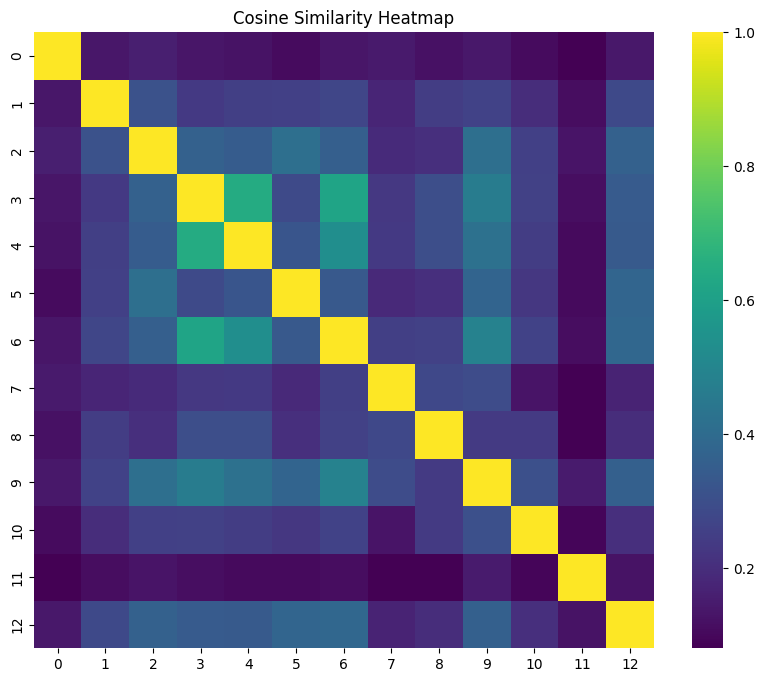

In [63]:
# prompt: Using dataframe body_answer_df: get cosine similarity for answe r column in above body_answer_df, also plot an heatmap

# Assuming body_answer_df is already created as in the provided code.

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

def get_cosine_similarity_and_plot(df):
    """
    Calculates cosine similarity for the 'answer' column in a DataFrame and plots a heatmap.
    """
    try:
        # Create TF-IDF vectors
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform(df['answer'].astype(str))

        # Calculate cosine similarity
        cosine_similarities = cosine_similarity(tfidf_matrix)
        # body_answer_df['cosine_similarity'] = cosine_similarities.diagonal()
        # Create heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(cosine_similarities, cmap="viridis")
        plt.title("Cosine Similarity Heatmap")
        plt.show()

        return cosine_similarities
    except KeyError:
        print("Error: 'answer' column not found in the DataFrame.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

cosine_similarities = get_cosine_similarity_and_plot(filtered_tag_df_incident)
# body_answer_df

In [64]:
# prompt: get the answer column in the above dataframe whose cosine similarity is greater than equal to 0.5

import numpy as np

# Assuming 'cosine_similarities' and 'body_answer_df' are defined from the previous code
# and 'cosine_similarities' is a NumPy array.


# Convert cosine_similarities to a DataFrame for easier indexing
cosine_sim_df = pd.DataFrame(cosine_similarities)

# Find indices where cosine similarity >= 0.5
indices = np.where(cosine_sim_df >= 0.5)

# Get the corresponding answers
answers = filtered_tag_df_incident.iloc[indices[0]]['answer']

answers

,answer
23,"Dear <name>, please check if the color ink car..."
71,Subject: Re: Issue with Microsoft Surface Pro ...
472,"Dear <name>,\n\nThank you for bringing this to..."
815,"Hello <name>,\n\nThank you for getting in touc..."
815,"Hello <name>,\n\nThank you for getting in touc..."
815,"Hello <name>,\n\nThank you for getting in touc..."
941,"Hi <name>,\n\nWe appreciate your message. Scre..."
941,"Hi <name>,\n\nWe appreciate your message. Scre..."
941,"Hi <name>,\n\nWe appreciate your message. Scre..."
973,"Dear <name>,\n\nThank you for contacting us ab..."


##Predicting the "type" feature using "body" feature

Training Accuracy: 0.9560439560439561
Training Classification Report:
               precision    recall  f1-score   support

      Change       1.00      1.00      1.00        22
    Incident       0.92      1.00      0.96       119
     Problem       0.98      0.93      0.96        61
     Request       1.00      0.89      0.94        71

    accuracy                           0.96       273
   macro avg       0.97      0.96      0.96       273
weighted avg       0.96      0.96      0.96       273

Validation Accuracy: 0.4745762711864407
Validation Classification Report:
               precision    recall  f1-score   support

      Change       0.40      0.50      0.44         4
    Incident       0.52      0.65      0.58        26
     Problem       0.27      0.23      0.25        13
     Request       0.60      0.38      0.46        16

    accuracy                           0.47        59
   macro avg       0.45      0.44      0.43        59
weighted avg       0.48      0.47      

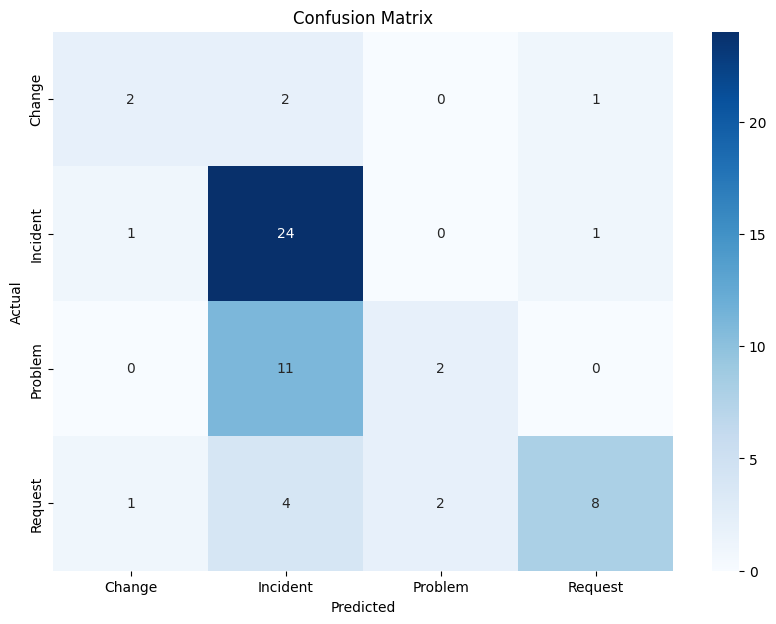


--- Sample Prediction ---
Text: I am writing to bring to your attention an issue with my newly purchased Dell XPS 13 9310. Despite the device being touted as having excellent battery performance, I have noticed that it holds a charge for only around 2 hours. This started happening just weeks after I received it. As the device is intended to be ultra-lightweight and suitable for on-the-go use, the faulty battery is a significant inconvenience. I believe this might be a defect, and I would appreciate it if you could advise on how to proceed with either a repair or replacement.
Predicted Type: Problem

Text: Dear Support Team at Tech Online Store,

I am seeking options for compatible detachable keyboards for my Microsoft Surface Pro 7. Would you be able to provide information on available products, their prices, and any suggestions you might have? I appreciate your help in improving the capabilities of my device.
Predicted Type: Request



In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data (replace with your dataset)
data = cluster_2_df_en
data.dropna(subset=['body', 'type'])

X = data['body'].astype(str)
y = data['type']

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Pipeline for text preprocessing and model training
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=2000, ngram_range=(1, 2))),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model on training data
y_train_pred = grid_search.best_estimator_.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)

print(f'Training Accuracy: {train_accuracy}')
print('Training Classification Report:\n', train_report)

# Evaluate the best model on validation data
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print('Validation Classification Report:\n', val_report)

# Final evaluation on test data
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print('Test Classification Report:\n', test_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


print("\n--- Sample Prediction ---")
sample_texts = [
    "I am writing to bring to your attention an issue with my newly purchased Dell XPS 13 9310. Despite the device being touted as having excellent battery performance, I have noticed that it holds a charge for only around 2 hours. This started happening just weeks after I received it. As the device is intended to be ultra-lightweight and suitable for on-the-go use, the faulty battery is a significant inconvenience. I believe this might be a defect, and I would appreciate it if you could advise on how to proceed with either a repair or replacement.",
    "Dear Support Team at Tech Online Store,\n\nI am seeking options for compatible detachable keyboards for my Microsoft Surface Pro 7. Would you be able to provide information on available products, their prices, and any suggestions you might have? I appreciate your help in improving the capabilities of my device."
]
sample_preds = best_model.predict(sample_texts)
for text, pred in zip(sample_texts, sample_preds):
    print(f"Text: {text}\nPredicted Type: {pred}\n")

#Responses

## If Cluster = 2, type = Problem, queue = Product Support, business_type = Tech Online Store, tag_1 = Technical Support, tag_2 = Product Support, tag_3 = Hardare Failure
#Total 7 in Dataset


Subject: Re: [Device/Issue Description]

Dear ,

Thank you for reaching out regarding the issue with your [Device Name/Model]. We understand how [brief description of the inconvenience, e.g., a non-responsive touchscreen or unexpected shutdown] can disrupt your experience, and we apologize for the inconvenience caused.

To address this issue, please follow these troubleshooting steps:

Ensure your [Device/System] is updated to the latest software and firmware.

Perform relevant diagnostic steps (e.g., Windows Troubleshooter, Safe Mode, resetting settings, etc.).

Check for physical factors such as overheating, external peripherals, or obstructed vents.

If the issue persists despite these steps, we recommend visiting our nearest authorized service center for a professional assessment. Please bring the following documents:

Proof of purchase

Warranty details

A valid identification (if required)

If your device is still under warranty, repairs or replacements may be covered, subject to terms and conditions.

For remote assistance or further inquiries, feel free to contact us at  or <tel_num>. Please reference your order/account number (<acc_num>) for a quicker response.

We are committed to resolving your issue swiftly and ensuring your device is back to optimal performance.

Best regards,[Tech Support Team Name][Company Name] Customer Support

## If Cluster = 2, type = Incident, queue = Product Support, business_type = Tech Online Store, tag_1 = Technical Support, tag_2 = Product Support, tag_3 = Hardare Failure

#Count = 13

Subject: Re: [Device/Issue Description]

Dear ,

Thank you for reaching out regarding the issue with your [Device Name/Model]. We understand how [brief description of the inconvenience, e.g., screen flickering, slow charging, or network issues] can disrupt your experience, and we apologize for the inconvenience caused.

To address this issue, please follow these troubleshooting steps:

Ensure your [Device/System] is updated to the latest software, drivers, and firmware.

Perform relevant diagnostic steps (e.g., Windows Troubleshooter, Safe Mode, resetting SMC/NVRAM, or updating BIOS/firmware).

Check for physical factors such as overheating, external peripherals, cable connections, or obstructed vents.

For hardware-related concerns, attempt basic resets (e.g., power cycle, holding the power button, or resetting specific device components).

If the issue persists despite these steps, we recommend visiting our nearest authorized service center for a professional assessment. Please bring the following documents:

Proof of purchase

Warranty details

A valid identification (if required)

If your device is still under warranty, repairs or replacements may be covered, subject to terms and conditions.

For remote assistance or further inquiries, feel free to contact us at  or <tel_num>. Please reference your order/account number (<acc_num>) for a quicker response.

We are committed to resolving your issue swiftly and ensuring your device is back to optimal performance.

Best regards,[Tech Support Team Name][Company Name] Customer Support